# Obligatorio - Taller Agentes Inteligentes 2025

En este trabajo obligatorio aplicaremos los conceptos vistos en el curso para dise√±ar, implementar y evaluar agentes capaces de aprender a jugar al cl√°sico **Breakout** de Atari, utilizando el entorno provisto por Farama Gymnasium ([https://ale.farama.org/environments/breakout/](https://ale.farama.org/environments/breakout/)).

<p align="center">
  <img src="https://media.tenor.com/oMxHgRrISJsAAAAM/atari-deep-learning.gif" alt="Atari Deep Learning"/>
</p>


El ejercicio se enmarca en un contexto de aprendizaje pr√°ctico, donde trabajaremos con las interfaces est√°ndar de Gymnasium para:

1. **Profundizar en algoritmos de valor**: implementaremos y compararemos dos variantes de Q-Learning basadas en redes neuronales profundas:
   * **Deep Q Learning (DQN)**
   * **Double Deep Q Learning (DDQN)**
2. **Evaluar rendimiento y estabilidad**: registraremos las recompensas obtenidas durante el entrenamiento de cada agente y analizaremos su comportamiento mediante gr√°ficas comparativas.
3. **Demostrar resultados de forma visual**: capturaremos v√≠deos que muestren a cada agente ‚Äúresolviendo‚Äù el entorno, entendido como la habilidad de romper al menos cinco bloques en una partida.

Debido a las limitaciones de tiempo y c√≥mputo propias de un entorno de curso, no se espera entrenar modelos durante m√°s de diez horas por agente. Por ello, ser√° fundamental:

* Integrar puntos de **checkpoint** para guardar peri√≥dicamente los pesos de la red.
* Seguir en los puntos 2 y 3 la arquitectura y t√©cnicas originales propuestas en los papers seminales de DQN y DDQN, dejando la experimentaci√≥n adicional para el punto extra.
* Flexibilizar la notebook de gu√≠a: pueden reorganizarla o dividirla en m√∫ltiples archivos seg√∫n su conveniencia.


## Objetivos y tareas

1. **Completar la implementaci√≥n**
   * Rellenar el c√≥digo faltante en la notebook y en los m√≥dulos auxiliares para que los agentes puedan interactuar con el entorno de Breakout.
2. **Entrenar agentes**
   * Ajustar y entrenar un **DQN** que alcance la condici√≥n de ‚Äúresolver‚Äù (romper ‚â• 10 bloques).
   * Ajustar y entrenar un **DDQN** con la misma meta de desempe√±o.
3. **Visualizar y analizar resultados**
   * Generar **gr√°ficas comparativas** de las recompensas obtenidas por ambos agentes en el mismo entorno (una gr√°fica por ambiente). Adem√°s se sugiere gr√°ficas que muestren el valor de la funci√≥n de valor Q para cada agente.
   * Extraer **al menos dos conclusiones** por gr√°fica, comentando diferencias en convergencia, estabilidad y comportamiento exploratorio.
4. **Registro de demostraciones**
   * Grabar y entregar un **video demostrativo** de cada agente resolviendo el entorno.
5. **Experimentaci√≥n**
   * Probar otras arquitecturas, t√©cnicas de mejora o m√≥dulos de procesamiento de entradas m√°s avanzados, documentando brevemente su impacto/

## Criterios de evaluaci√≥n

| Criterio                                  | Descripci√≥n                                                  | Peso |
| ----------------------------------------- | ------------------------------------------------------------ | ---- |
| **Implementaci√≥n y rendimiento**          | DQN y DDQN completados; cada agente rompe ‚â• 10 bloques       | 40%  |
| **Estructura y narrativa de la notebook** | Secciones claras, explicaci√≥n de decisiones, ‚Äúhistoria‚Äù      | 20%  |
| **An√°lisis de resultados**                | Gr√°ficas comparativas; ‚â• 2 conclusiones por gr√°fico          | 20%  |
| **Presentaci√≥n visual**                   | V√≠deos demostrativos de cada agente                          | 10%  |
| **Experimentaci√≥n**                       | Experimentaci√≥n adicional documentada y analizada brevemente | 10%  |

## Bibliograf√≠a

* **Mnih, V.**, Kavukcuoglu, K., Silver, D., Rusu, A. A., Veness, J., Bellemare, M. G., ‚Ä¶ Hassabis, D. (2013). *Playing Atari with Deep Reinforcement Learning*. [arXiv:1312.5602](https://arxiv.org/abs/1312.5602)
* **van Hasselt, H.**, Guez, A., & Silver, D. (2015). *Deep Reinforcement Learning with Double Q-learning*. [arXiv:1509.06461](https://arxiv.org/abs/1509.06461)
* **Sutton, R. S.**, & Barto, A. G. (2018). *Reinforcement Learning: An Introduction* (2nd ed.), cap√≠tulo 16.5: ‚ÄúHuman-level Video Game Play‚Äù. MIT Press.

## Setup

**Acceso a Google Drive para persistencia**

In [1]:
# Validamos si estamos en Google Colab, y cargamos
# las librer√≠as necesarias y montamos
# la carpeta de trabajo.
try:
    from google.colab import drive
    drive.mount('/content/drive')
    import google.colab
    IN_COLAB = True
    print("Ejecutando desde Google Colab")
except:
    print("Ejecutando de forma local")
    IN_COLAB = False

# Agregamos m√≥dulos necesarios
if IN_COLAB:
  !pip install torchinfo

if IN_COLAB:
  import sys
  import os
  BASE_DIR = '/content/drive/MyDrive/2025obltalleria_v4'
  sys.path.append(BASE_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ejecutando desde Google Colab


**Imports**

In [2]:
import os
import torch
import numpy as np
import random
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import gymnasium
import ale_py
from utils import make_env, show_observation_stack, plot_rewards, get_timestamp, save_numpy_array, load_numpy_array, load_model_checkpoint
from IPython.display import Video

ALE (Atari Learning Environment) es un entorno de aprendizaje para videojuegos de Atari. En este caso, utilizaremos el entorno de Breakout. Es necesario entender que se separa el entorno de los roms de Atari, que son los juegos en s√≠. El entorno de ALE permite interactuar con los juegos de Atari a trav√©s de una API est√°ndar, facilitando la implementaci√≥n de algoritmos de aprendizaje por refuerzo.

Debemos instalar los roms por separado, para ello primero tenemos que saber donde est√°n los roms de Atari.

In [3]:
gymnasium.register_envs(ale_py) # registramos todos los entornos de ale_py
ruta_init = ale_py.roms.__file__ # debemos saber donde se encuentra la carpeta roms
ALE_ROMS_PATH = os.path.dirname(ruta_init)
print(ALE_ROMS_PATH)

/usr/local/lib/python3.11/dist-packages/ale_py/roms


In [4]:
print(f"ROMs path: {ALE_ROMS_PATH}")

ROMs path: /usr/local/lib/python3.11/dist-packages/ale_py/roms


Podemos usar los siguientes comando para instalar los roms y colocalos en la carpeta correcta.

In [5]:
# !pip install "autorom[accept-rom-license]"
# !AutoROM --accept-license --install-dir {ALE_ROMS_PATH}

Fijamos la semilla para que los resultados sean reproducibles

In [6]:
SEED = 24

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic=True # https://discuss.pytorch.org/t/what-is-the-differenc-between-cudnn-deterministic-and-cudnn-benchmark/38054
torch.backends.cudnn.benchmark=True # https://discuss.pytorch.org/t/what-does-torch-backends-cudnn-benchmark-do/5936/4
np.random.seed(SEED)
random.seed(SEED)

Vemos que dispositivo tenemos, si es GPU, MPS o CPU. **El uso de GPU es altamente recomendable** para acelerar el entrenamiento de los modelos.

In [7]:
# Algunas constantes

# definimos el dispositivo que vamos a usar
DEVICE = "cpu"  # por defecto, usamos la CPU
if torch.cuda.is_available():
    DEVICE = "cuda"  # si hay GPU, usamos la GPU
elif torch.backends.mps.is_available():
    DEVICE = "mps"  # si no hay GPU, pero hay MPS, usamos MPS

print(f"Device: {DEVICE}")

Device: cuda


## Preprocesando Atari

Para reproducir fielmente el enfoque de Mnih et al. (2013) y reducir la carga computacional al trabajar con im√°genes de Atari (210 √ó 160 p√≠xeles, 128 colores), aplicamos el siguiente preprocesado œÜ a las √∫ltimas **4** frames del entorno:

1. **Conversi√≥n a escala de grises**
   Eliminamos la informaci√≥n de color (GRAYSCALE = True), pues la luminosidad es suficiente para capturar la din√°mica de juego y reduce dr√°sticamente la dimensionalidad de la entrada.

2. **Down-sampling y recorte**
   * Redimensionamos la imagen original a 110 √ó 84 p√≠xeles, manteniendo la proporci√≥n horizontal.
   * Recortamos un √°rea central de 84 √ó 84 p√≠xeles que contiene la ‚Äúzona de juego‚Äù, descartando bordes innecesarios.
     Este paso (SCREEN_SIZE = 84) no solo concentra la atenci√≥n del modelo en la regi√≥n relevante, sino que tambi√©n garantiza un tama√±o cuadrado compatible con las implementaciones de convoluciones en GPU.

3. **Saltos temporales (frame skipping)**
   Procesamos cada 4 frames (SKIP_FRAMES = 4), repitiendo la misma acci√≥n durante esos pasos. Esto reduce la redundancia temporal, acelera el entrenamiento y mantiene la coherencia del movimiento de la paleta y la bola.

4. **Apilamiento de frames**
   Finalmente, acumulamos las √∫ltimas 4 im√°genes preprocesadas (NUM_STACKED_FRAMES = 4) en un √∫nico tensor de entrada. As√≠ el agente puede inferir la velocidad y direcci√≥n de los elementos m√≥viles a partir de la diferencia entre frames.

Este esquema de preprocesado es fundamental para disminuir el espacio de entrada, acelerar las convoluciones y proporcionar al Q-net una representaci√≥n compacta y rica en informaci√≥n din√°mica, tal como se describe en el algoritmo 1 del paper original .

> Se recomienda ver el m√©todo `make_env` en el archivo `utils.py` para entender c√≥mo se implementa este preprocesado.

In [8]:
GRAY_SCALE = True # si True, convertimos la imagen a escala de grises
SCREEN_SIZE = 84 # redimensionamos a SCREEN_SIZExSCREEN_SIZE
NUM_STACKED_FRAMES = 4 # apilamos NUM_STACKED_FRAMES frames
SKIP_FRAMES = 4 # saltamos SKIP_FRAMES frames (haciendo la misma acci√≥n)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/drive/MyDrive/2025obltalleria_v4/videos/random folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


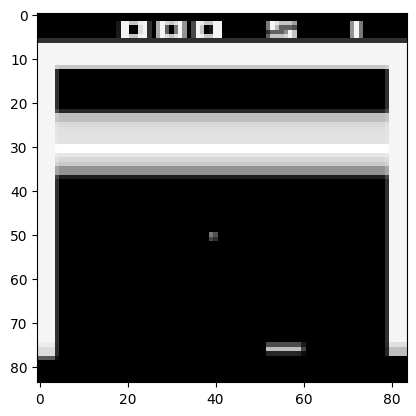

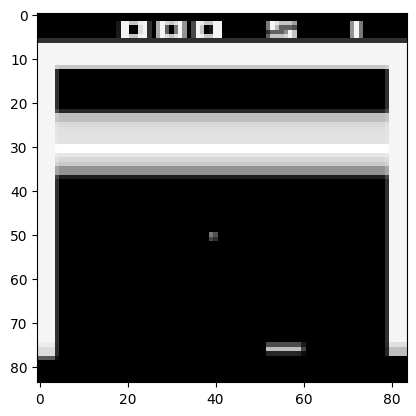

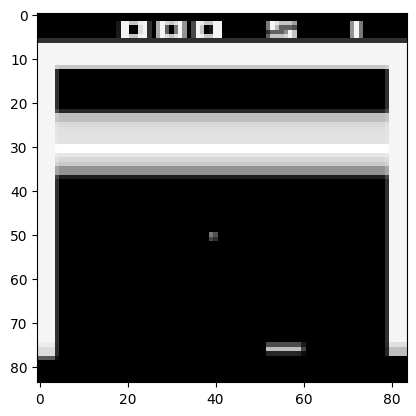

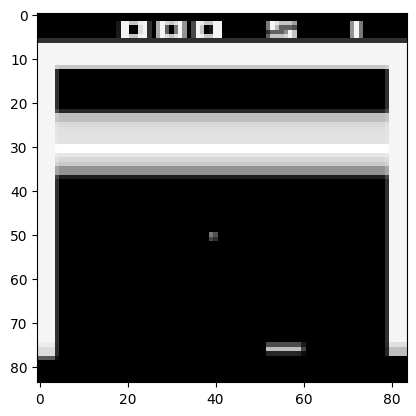

Episode 1 finished with total reward: 0


In [9]:
# https://ale.farama.org/environments/breakout/
ENV_NAME = "ALE/Breakout-v5"

env = make_env(ENV_NAME,
                video_folder=BASE_DIR + '/videos/random',
                name_prefix="breakout",
                record_every=1,
                grayscale=GRAY_SCALE,
                screen_size=SCREEN_SIZE,
                stack_frames=NUM_STACKED_FRAMES,
                skip_frames=SKIP_FRAMES
                )

for episode_num in range(1):
    obs, info = env.reset()
    show_observation_stack(obs)
    reward_total = 0
    episode_over = False
    while not episode_over:
        action = env.action_space.sample()  # seleccionamos una acci√≥n aleatoria
        obs, reward, terminated, truncated, info = env.step(action)
        reward_total += reward
        episode_over = terminated or truncated
    print(f"Episode {episode_num + 1} finished with total reward: {reward_total}")

env.close()

Adem√°s, podemos mostrar los videos capturados por el entorno de Atari de la siguiente manera:

In [10]:
# Ruta al archivo de v√≠deo en tu sistema de ficheros
video_path = BASE_DIR + "/videos/random/breakout-episode-0.mp4"

# Muestra el v√≠deo
Video(video_path, embed=True, width=600)

# Exploraci√≥n del entorno

In [11]:
print("Actions shape:",env.action_space)
print("Observation shape:",env.observation_space.shape)
env.reset()
next_state, reward, terminated, truncated, info = env.step(action=0)

print(f"{next_state.shape},\n {reward},\n {terminated},\n {info}")

Actions shape: Discrete(4)
Observation shape: (4, 84, 84)
(4, 84, 84),
 0,
 False,
 {'lives': 5, 'episode_frame_number': 10, 'frame_number': 495}


### Acciones
...

### Observaciones
...

# Deep Q Learning

Deep Q Learning extiende el algoritmo cl√°sico de Q-learning al emplear una **red neuronal profunda** como aproximador de la funci√≥n de valor $Q(s,a)$. Inspirado en Mnih et al. (2013), este m√©todo utiliza una **red convolucional** para procesar directamente las im√°genes del entorno Atari, un **replay buffer** para romper la correlaci√≥n temporal de las muestras. La pol√≠tica sigue un esquema **Œµ-greedy**, balanceando exploraci√≥n y explotaci√≥n, y se entrena minimizando el error de la ecuaci√≥n de Bellman sobre lotes de transiciones muestreadas de manera aleatoria.

<p align="center">
  <img src="https://www.researchgate.net/profile/Faris-Mismar/publication/327045314/figure/fig4/AS:819677282455553@1572437701142/Structure-of-the-neural-network-used-for-the-Deep-Q-learning-Network-implementation-with.png" alt="DQN"/>
</p>

Fuente: [arXiv:1312.5602](https://arxiv.org/abs/1312.5602)

## Memoria

El algoritmo de Deep Q Learning presentado en el paper utiliza una memoria (llamada Replay Memory) para almacenar transiciones pasadas. Tuplas que contienen un estado base, la accion tomada, la recompensa obtenida, una bandera que indica si el siguiente estado es final o no; y el estado siguiente.

Esta memoria es circular, es decir, tiene un l√≠mite maximo de elementos y una vez est√© llena comienza a reemplazar los elementos m√°s viejos.

Vamos a necesitar crear una funci√≥n **sample** que obtiene una mustra aleatoria de elementos de la memoria.  Esto puede ser una lista de Transiciones o listas separadas (pero alineadas) de los elementos que las componen.


> Para implementar esta funcionalidad se debe modificar el archivo **replay_memory.py**

In [12]:
from replay_memory import ReplayMemory, Transition

# Creamos la memoria de repetici√≥n
replay_memory = ReplayMemory(3)

# A√±adimos transiciones a la memoria (solo las 3 √∫ltimas se guardan)
replay_memory.add('state1', 'action1', 'reward1', 'done1', 'next_state1' )
replay_memory.add('state2', 'action2', 'reward2', 'done2', 'next_state2')
replay_memory.add('state3', 'action3', 'reward3', 'done3', 'next_state3')
replay_memory.add('state4', 'action4', 'reward4', 'done4', 'next_state4')

# Mostramos el tama√±o de la memoria
print(f"Memory size: {len(replay_memory)}\n")

# Mostramos un sample de la memoria
sampled = replay_memory.sample(2)
print(f"Memory sample:")
for i, sample in enumerate(sampled):
    print(f"Sample {i}: {sample}")


Memory size: 3

Memory sample:
Sample 0: Transition(state='state3', action='action3', reward='reward3', done='done3', next_state='next_state3')
Sample 1: Transition(state='state2', action='action2', reward='reward2', done='done2', next_state='next_state2')


## Modelo

Vamos a usar un mismo modelo FeedForward para estos dos problemas (entrenado en cada problema particular). Recomendamos simplicidad en la creaci√≥n del mismo, pero tienen total libertad al momento de implementarlo.

> Para implementar esta funcionalidad se debe modificar el archivo **dqn_cnn_model.py**. Se recomienda empezar por una arquitectura simple como la que se muestra en el paper de Mnih et al. (2013) y luego experimentar con arquitecturas m√°s complejas.

In [13]:
from dqn_cnn_model import DQN_CNN_Model

env = make_env(ENV_NAME,
                record_every=None,
                grayscale=GRAY_SCALE,
                screen_size=SCREEN_SIZE,
                stack_frames=NUM_STACKED_FRAMES,
                skip_frames=SKIP_FRAMES
                )
print("Actions shape:",env.action_space)
print("Observation shape:",env.observation_space.shape)

env.close()

cnn_model = DQN_CNN_Model(env.observation_space.shape, env.action_space.n).to(DEVICE)
summary(cnn_model, input_size=(32, SKIP_FRAMES, SCREEN_SIZE, SCREEN_SIZE), device=DEVICE) # 32 es el batch size

Actions shape: Discrete(4)
Observation shape: (4, 84, 84)


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:416: UserWarning: WARN: Unable to save last video! Did you call close()?
  logger.warn("Unable to save last video! Did you call close()?")


Layer (type:depth-idx)                   Output Shape              Param #
DQN_CNN_Model                            [32, 4]                   --
‚îú‚îÄConv2d: 1-1                            [32, 16, 20, 20]          4,112
‚îú‚îÄConv2d: 1-2                            [32, 32, 9, 9]            8,224
‚îú‚îÄLinear: 1-3                            [32, 256]                 663,808
‚îú‚îÄLinear: 1-4                            [32, 4]                   1,028
Total params: 677,172
Trainable params: 677,172
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 95.22
Input size (MB): 3.61
Forward/backward pass size (MB): 2.37
Params size (MB): 2.71
Estimated Total Size (MB): 8.69

La red esta definida para que reciba un tensor de 4 dimensiones (batch_size, num_frames, height, width) y devuelve un tensor de 2 dimensiones (batch_size, num_actions). La funci√≥n `forward` es la encargada de definir el flujo de datos a trav√©s de la red. En este caso, se utiliza una red convolucional seguida de capas totalmente conectadas

In [14]:
obs_tensor_batch = torch.rand((NUM_STACKED_FRAMES,SCREEN_SIZE,SCREEN_SIZE)).unsqueeze(0).to(DEVICE) # A√±adimos una dimensi√≥n para el batch y lo pasamos al dispositivo


In [15]:
# Verificamos el shape del tensor de entrada
# el cual deber√° ser de (1, n√∫meros de cuadros, 84, 84)
# Durante nuestro entrenamiento, la primera dimensi√≥n
# ser√° el tama√±o del batch, pero en este caso, al crearse
# una sola muestra, el tama√±o es 1.
print(f"Shape del tensor de entrada: {obs_tensor_batch.shape}")

Shape del tensor de entrada: torch.Size([1, 4, 84, 84])


Los valores de Q se obtienen a partir de la salida de la red, cada columna representa el valor Q para cada acci√≥n posible en el estado actual.

In [16]:
print(f"Q-values shape: {cnn_model(obs_tensor_batch).shape}") # shape: (1, num_actions)

Q-values shape: torch.Size([1, 4])


In [17]:
cnn_model(obs_tensor_batch)

tensor([[ 0.0396, -0.0135, -0.0619, -0.0496]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

Podemos preguntar cu√°l es la acci√≥n con mayor valor Q en un estado.

In [18]:
cnn_model(obs_tensor_batch).max(1)

torch.return_types.max(
values=tensor([0.0396], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([0], device='cuda:0'))

En el siguiente ejemplo vamos a ver c√≥mo tomar los valores de acciones deseables para un conjunto de estados.

In [19]:
# Creamos 3 observaciones aleatorias para probar el modelo
obs_ran1 = torch.rand(4, 84, 84)
obs_ran2 = torch.rand(4, 84, 84)
obs_ran3 = torch.rand(4, 84, 84)

batch = torch.stack([obs_ran1, obs_ran2, obs_ran3], dim=0).to(DEVICE) # shape: (3, 4, 84, 84)
print(f"Batch shape: {batch.shape}")

actions =  torch.tensor([1, 2, 3], device=DEVICE).unsqueeze(1) # queremos la acci√≥n 1 para la primera observaci√≥n, la acci√≥n 2 para la segunda y la acci√≥n 3 para la tercera
print(actions.shape)

Q_test = cnn_model(batch)
print(f"Q-values: {Q_test}")
print(f"Q-values: {Q_test.gather(1, actions)}") # https://pytorch.org/docs/main/generated/torch.gather.html

Batch shape: torch.Size([3, 4, 84, 84])
torch.Size([3, 1])
Q-values: tensor([[ 0.0155, -0.0168, -0.0644, -0.0498],
        [ 0.0401, -0.0106, -0.0751, -0.0769],
        [ 0.0320, -0.0209, -0.0616, -0.0352]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Q-values: tensor([[-0.0168],
        [-0.0751],
        [-0.0352]], device='cuda:0', grad_fn=<GatherBackward0>)


## Phi

La funci√≥n para procesar los estados (phi en el paper) que es necesaria para poder usar el modelo de Pytorch con las representaciones de gym. Esta funci√≥n pasa una observaci√≥n de gym a un tensor de Pytorch y la normaliza.

> T√©cnicamente la funci√≥n phi tiene m√°s responsabilidades, como la de apilar los frames y el downsampling. En nuestro caso se lo delegamos a los wrappers de gymnasium.

In [20]:
def process_state(obs):
    """
    Preprocess the state to be used as input for the model (transform to tensor).
    """
    return torch.tensor(obs, dtype=torch.float32, device=DEVICE) / 255.0

obs, _ = env.reset()
obs_tensor = process_state(obs)
print(f"Observation shape: {obs_tensor.shape}")

Observation shape: torch.Size([4, 84, 84])


## Agente

Vamos a definir una clase agente (abstracto), encargado de interactuar con el ambiente y entrenar los modelos. Los m√©tdos definidos deben funcionar para ambos problemas simplemente cambiando el modelo a utilizar para cada ambiente.

Abajo dejamos un esqueleto del mismo y las funciones a completar. Recomendamos no alterar la estructura del mismo, pero pueden definir las funciones auxiliares que consideren necesarias.

> Para implementar esta funcionalidad se debe modificar los archivos **abstract_agent.py** y **dqn_agent.py**.

Funciones a completar:


1. **init**: que inicializa los parametros del agente.

2. **compute_epsilon**: que computa el valor actual de epsilon en base al n√∫mero de pasos actuales y si esta entrenando o no.

3. **select_action**: Seleccionando acciones "epsilongreedy-mente" si estamos entranando y completamente greedy en otro caso.

4. **train**: que entrena el agente por un n√∫mero dado de episodios de largo determinado.

5. **record_test_episode**: para grabar un episodio con el agente siempre seleccionando la mejor accion conocida.

## Entrenamiento

In [21]:
#Hiperpar√°metros de entrenamiento del agente DQN
# TOTAL_STEPS = 10_000_000
#TOTAL_STEPS = 1_000_000
#EPISODES = 10_000
#STEPS_PER_EPISODE = 20_000

#EPSILON_INI = 1
#EPSILON_MIN = 0.05
#EPSILON_ANNEAL_STEPS = 1_000_000

#EPISODE_BLOCK = 100

#BATCH_SIZE = 32
#BUFFER_SIZE = 50_000
##BUFFER_SIZE = 10_000

#GAMMA = 0.995
#LEARNING_RATE = 1e-5

In [22]:
# Hiperpar√°metros de Joaqu√≠n Vigna
TOTAL_STEPS = 10_000_000
EPISODES = 10_000
STEPS_PER_EPISODE = 20_000

EPSILON_INI = 1
EPSILON_MIN = 0.05
EPSILON_ANNEAL_STEPS = 1_000_000

EPISODE_BLOCK = 100

BATCH_SIZE = 32
BUFFER_SIZE = 30_000

GAMMA = 0.995
LEARNING_RATE = 0.00025

In [ ]:
from dqn_agent import DQNAgent
import numpy
# Por aspectos de seguridad en la serializaci√≥n de la red,
# importamos "add_safe_globals"
# from torch.serialization import add_safe_globals
# add_safe_globals([DQN_CNN_Model])
# torch.serialization.add_safe_globals([torch.nn.modules.conv.Conv2d])
# torch.serialization.add_safe_globals([torch.nn.modules.linear.Linear])
# torch.serialization.add_safe_globals([numpy._core.multiarray.scalar])
# torch.serialization.add_safe_globals([numpy.dtype])

env = make_env(ENV_NAME,
                video_folder=BASE_DIR + '/videos/dqn_training',
                name_prefix="breakout",
                record_every=500,
                grayscale=GRAY_SCALE,
                screen_size=SCREEN_SIZE,
                stack_frames=NUM_STACKED_FRAMES,
                skip_frames=SKIP_FRAMES
                )

net = DQN_CNN_Model(env.observation_space.shape, env.action_space.n).to(DEVICE)

dqn_agent = DQNAgent(env, net, process_state, BUFFER_SIZE, BATCH_SIZE, LEARNING_RATE, GAMMA, epsilon_i=EPSILON_INI, epsilon_f=EPSILON_MIN, epsilon_anneal_steps=EPSILON_ANNEAL_STEPS, episode_block=EPISODE_BLOCK, device=DEVICE)

dqn_rewards = dqn_agent.train(EPISODES, STEPS_PER_EPISODE, TOTAL_STEPS)

# Salvamos los rewards en disco, por si la sesi√≥n se desconecta
DATA_BASE_DIR = BASE_DIR + 'data/'
save_numpy_array(DATA_BASE_DIR, 'dqn_rewards', dqn_rewards)

env.close()

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/drive/MyDrive/2025obltalleria_v4/videos/dqn_training folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Entrenando:   0%|          | 1/10000 [00:01<4:10:48,  1.51s/episode, reward=0, epsilon=1, steps=124]

Modelo guardado en /content/drive/MyDrive/2025obltalleria_v4/data/dqn_model_0.pth


Entrenando:  15%|‚ñà‚ñå        | 1501/10000 [20:26<2:03:37,  1.15episode/s, reward=1.4, epsilon=0.745, steps=267912]

Modelo guardado en /content/drive/MyDrive/2025obltalleria_v4/data/dqn_model_1500.pth


Entrenando:  17%|‚ñà‚ñã        | 1737/10000 [23:45<2:13:59,  1.03episode/s, reward=1.61, epsilon=0.704, steps=312024]

In [ ]:
# Mostramos la evoluci√≥n de las recomensas
dqn_rewards_2 = dqn_rewards[::1000]
plot_rewards(dqn_rewards_2, title="DQN Agent Training Rewards")


In [ ]:
env = make_env(ENV_NAME,
                video_folder=BASE_dir + '/videos/dqn_validation',
                name_prefix="breakout",
                record_every=1,
                grayscale=GRAY_SCALE,
                screen_size=SCREEN_SIZE,
                stack_frames=NUM_STACKED_FRAMES,
                skip_frames=SKIP_FRAMES
                )

dqn_agent.play(env, episodes=3)

env.close()

In [ ]:
# Ruta al archivo de v√≠deo en tu sistema de ficheros
video_path = BASE_DIR + "/videos/dqn_validation/breakout-episode-0.mp4"

# Muestra el v√≠deo
Video(video_path, embed=True, width=600)

#### Graficas
...

# Double Deep Q Learning

Double DQN mejora la versi√≥n cl√°sica de DQN corrigiendo el sesgo de sobreestimaci√≥n de los valores
ùëÑ
Q. Para ello, desacopla la selecci√≥n de la acci√≥n de su evaluaci√≥n: en cada paso, la red online elige la acci√≥n que maximiza
ùëÑ
Q, pero la red objetivo distinta estima el valor de esa acci√≥n. Esta separaci√≥n reduce el sesgo hacia valores demasiado optimistas y aporta mayor estabilidad al entrenamiento. El resto de la estructura ‚Äîreplay buffer, pol√≠tica Œµ-greedy, etc‚Äî se mantiene igual que en DQN, aprovechando as√≠ un dise√±o casi id√©ntico al original pero con resultados m√°s fiables .

Fuente: [arXiv:1509.06461](https://arxiv.org/abs/1509.06461)

> Vamos a utilizar el mismo modelo de red neuronal creado para el problema anterior y la misma implementaci√≥n de memoria, dejamos un esqueleto de un agente de Double Deep Q learning para completar en el archivo **double_dqn_agent.py**

In [ ]:
from double_dqn_agent import DoubleDQNAgent

env = make_env(ENV_NAME,
                video_folder='./videos/ddqn_training',
                name_prefix="breakout",
                record_every=500,
                grayscale=GRAY_SCALE,
                screen_size=SCREEN_SIZE,
                stack_frames=NUM_STACKED_FRAMES,
                skip_frames=SKIP_FRAMES
                )


modelo_a = DQN_CNN_Model(env.observation_space.shape, env.action_space.n).to(DEVICE)
modelo_b = DQN_CNN_Model(env.observation_space.shape, env.action_space.n).to(DEVICE)

ddqn_agent = DoubleDQNAgent(env, modelo_a, modelo_b, process_state, BUFFER_SIZE, BATCH_SIZE, LEARNING_RATE, GAMMA, epsilon_i= EPSILON_INI, epsilon_f=EPSILON_MIN, epsilon_anneal_steps=EPSILON_ANNEAL_STEPS, episode_block = EPISODE_BLOCK, device=DEVICE)

ddqn_rewards = ddqn_agent.train(EPISODES, STEPS_PER_EPISODE, TOTAL_STEPS)

In [ ]:
env = make_env(ENV_NAME,
                video_folder='./videos/ddqn_validation',
                name_prefix="breakout",
                record_every=1,
                grayscale=GRAY_SCALE,
                screen_size=SCREEN_SIZE,
                stack_frames=NUM_STACKED_FRAMES,
                skip_frames=SKIP_FRAMES
                )

ddqn_agent.play(env, episodes=3)

env.close()

In [ ]:
# Ruta al archivo de v√≠deo en tu sistema de ficheros
video_path = "./videos/ddqn_validation/breakout-episode-0.mp4"

# Muestra el v√≠deo
Video(video_path, embed=True, width=600)

#### Graficas
...

# Experimentaci√≥n

## Exploraci√≥n de par√°metros para DQN

A continuaci√≥n, buscaremos la combinaci√≥n de hiperpar√°metros que permite obtener la mayor reward, para el caso DQN. Para ello, utilizaremos la herramienta "Weight and Biases" para explorar diferentes ejecuciones (runs) y obtener el mejor resultado.

In [ ]:
# Primero, realizamos el login en la herramienta
import wandb
wandb.login()

In [ ]:
# Ahora, inicializamos el proyecto y la ejecuci√≥n
WANDB_TEAM_NAME = "goterov-universidad-ort-uruguay"
WANDB_PROJECT = "dqn-breakout"

sweep_config = {
    "name": "sweep-dqn-breakout",
    "method": "random",
    "metric": {"name": "reward", "goal": "maximize"},
    "parameters": {
        "learning_rate": {"distribution": "uniform", "max": 0.1, "min": 0.0001},
        "optimizer": {"values": ["adam", "sgd"]},
        "batch_size": {"values": [32, 256, 1024, 4096]},
        "gamma": {"distribution": "uniform", "max": 0.999, "min": 0.9},
        "epsilon_ini": {"distribution": "uniform", "max": 1.0, "min": 0.1},
        "epsilon_min": {"distribution": "uniform", "max": 0.1, "min": 0.01},
        "epsilon_anneal_steps": {"distribution": "int_uniform", "max": 1000000, "min": 100000},
        "episode_block": {"values": [10, 50, 100, 200]},
        "buffer_size": {"values": [10000, 50000, 100000, 200000]},
        "total_steps": {"values": [1000000, 5000000, 10000000]},
        "steps_per_episode": {"values": [1000, 5000, 10000]},
        "num_stacked_frames": {"values": [1, 2, 3, 4]},
        "skip_frames": {"values": [1, 2, 4, 8]},
        "screen_size": {"values": [84, 96, 128, 160]},
        "env_name": {"value": ENV_NAME},
        "device": {"value": DEVICE},
        "gray_scale": {"value": GRAY_SCALE},
        "wandb_team_name": {"value": WANDB_TEAM_NAME},
        "wandb_project": {"value": WANDB_PROJECT},
        "wandb_entity": {"value": "obltalleria"},
        "wandb_run_name": {"value": f"dqn_breakout_{get_timestamp()}"},
        "wandb_log_freq": {"value": 1000},
        "wandb_watch": {"value": True},
        "wandb_save_model": {"value": True},
        "wandb_log_rewards": {"value": True},
        "wandb_video_folder": {"value": BASE_DIR + '/videos/dqn_training/wandab'},
        "wandb_record_every": {"value": 500},
        "wandb_model_path": {"value": BASE_DIR + '/models/ddqn_breakout.pth'},
        "wandb_save_model_freq": {"value": 1000},
        "wandb_watch_freq": {"value": 1000},
        "wandb_log_rewards_freq": {"value": 1000},
        "wandb_video_freq": {"value": 500},
        "wandb_save_video": {"value": True},
        "wandb_save_rewards": {"value": True},
    },
}


In [ ]:
# Creamos el sweep en Weights & Biases
sweep_id = wandb.sweep(sweep_config, project=WANDB_PROJECT)

In [ ]:
# Definimos la funci√≥n "run" que se ejecutar√° en cada sweep
def run():
    # Inicializamos la ejecuci√≥n de Weights & Biases
    wandb.init()
    
    # Obtenemos los hiperpar√°metros del sweep
    config = wandb.config
    
    # Creamos el entorno
    env = make_env(config.env_name,
                    video_folder=config.wandb_video_folder,
                    name_prefix=config.wandb_run_name,
                    record_every=config.wandb_record_every,
                    grayscale=config.gray_scale,
                    screen_size=config.screen_size,
                    stack_frames=config.num_stacked_frames,
                    skip_frames=config.skip_frames
                    )
    
    # Creamos el modelo DQN
    net = DQN_CNN_Model(env.observation_space.shape, env.action_space.n).to(config.device)
    
    # Creamos el agente DQN
    dqn_agent = DQNAgent(env, net, process_state, config.buffer_size, config.batch_size, config.learning_rate, config.gamma, epsilon_i=config.epsilon_ini, epsilon_f=config.epsilon_min, epsilon_anneal_steps=config.epsilon_anneal_steps, episode_block=config.episode_block, device=config.device)
    
    # Entrenamos al agente DQN
    dqn_rewards = dqn_agent.train(config.total_steps, config.steps_per_episode)
    
    # Guardamos los rewards en Weights & Biases
    wandb.log({"rewards": dqn_rewards})

     # Salvamos el mejor modelo
    torch.save(net.state_dict(), "model.pth")
    wandb.save("model.pth")

    # Finalizamos la ejecuci√≥n de Weights & Biases
    wandb.finish()
    
    # Cerramos el entorno
    env.close()

In [ ]:
# Ejecutamos el sweep
wandb.agent(sweep_id, run, count=10) 

In [ ]:
# Obtenemos el mejor modelo del sweep
best_run = wandb.Api().run(f"{WANDB_TEAM_NAME}/{WANDB_PROJECT}/{sweep_id}")
best_model_path = best_run.file("model.pth").download(replace=True) 
# Cargamos el mejor modelo
best_model = DQN_CNN_Model(env.observation_space.shape, env.action_space.n).to(DEVICE)
best_model.load_state_dict(torch.load(best_model_path, map_location=DEVICE))
# Mostramos el resumen del mejor modelo
summary(best_model, input_size=(1, NUM_STACKED_FRAMES, SCREEN_SIZE, SCREEN_SIZE), device=DEVICE)
# Creamos un nuevo entorno para validar el mejor modelo
env = make_env(ENV_NAME,
                video_folder=BASE_DIR + '/videos/dqn_validation',
                name_prefix="breakout",
                record_every=1,
                grayscale=GRAY_SCALE,
                screen_size=SCREEN_SIZE,
                stack_frames=NUM_STACKED_FRAMES,
                skip_frames=SKIP_FRAMES
                )
# Validamos el mejor modelo
dqn_agent.play(env, episodes=3, model=best_model)

# Comparaciones, Resultados, Comentarios...
De aqu√≠ en adelante son libres de presentar como gusten los resultados comparativos de las t√©cnicas.
...